# In this notebook you will find.....

## Importing libraries and data

## Cleaning and preppring data for analysis

## Exploring relationship of price and ...

## Run regression algorithm on the selected variables

### Import libraries and data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r"C:\Users\Carter\Documents\Data Immersion\Advanced Analytics and Dashboard Design\NY Airbnb Self-Project"

In [3]:
# Import data
airbnb_ny = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','airbnb_ny_cleaned.csv'))

In [5]:
airbnb_ny.head()

,Unnamed: 0,id,airbnb_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,2539,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,2595,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,3647,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,3831,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,5022,1,0


## Clean and prepare data

### Missing values

In [6]:
# Check for missing values
airbnb_ny.isnull().sum()

Unnamed: 0                            0
id                                    0
airbnb_name                          16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In my previous cleaning I decided not to delete the data since it could be valuable and the name columns do really affect my analysis so I am going to leave them in.

In [7]:
# Check for duplicate values
dup = airbnb_ny[airbnb_ny.duplicated()]

In [8]:
dup

,Unnamed: 0,id,airbnb_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

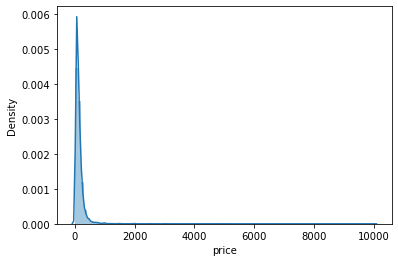

In [14]:
# Check for extreme values of price
sns.distplot(airbnb_ny['price'], bins = 100)

I will leave the extreme values in the data set for now, run a regression analysis on it and then remove them after.

## Explore relationship of price and minimum number of nights

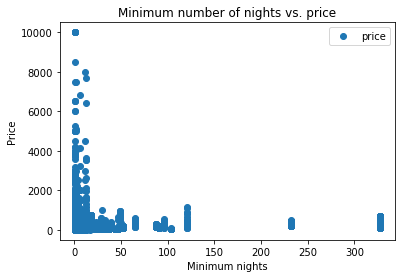

In [56]:
# Create scatterplot of availability and price
airbnb_ny.plot(x = 'calculated_host_listings_count',y='price',style = 'o')
plt.title('Host listings vs. price')
plt.xlabel('Count of host listings')
plt.ylabel('Price')
plt.show()

## Run regression model on host_listings_count and price

### Reshape variables

In [57]:
# Reshape variables in numpy and put into seperate variables
x = airbnb_ny['calculated_host_listings_count'].values.reshape(-1,1)
y = airbnb_ny['price'].values.reshape(-1,1)

In [33]:
x.shape

(48895, 1)

In [35]:
y.shape

(48895, 1)

### Split data into training and test set

In [58]:
# Split 30% of data into test set and 70% into a training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

### Run regression model on data

In [59]:
# Create regression object
regression = LinearRegression()

In [60]:
# Fit regression into train set
regression.fit(x_train, y_train)

LinearRegression()

In [61]:
# Predict the values of Y using X
y_predicted = regression.predict(x_test)

In [62]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

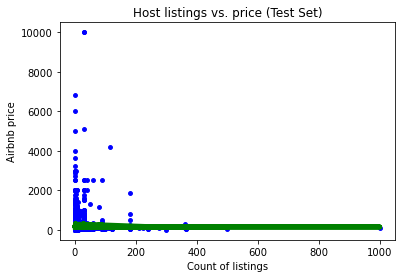

In [63]:
# Plot the regrression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, Y_test, color = 'blue', s = 15)
plot_test.plot(X_test, y_predicted, color = 'green', linewidth = 5)
plot_test.title('Host listings vs. price (Test Set)')
plot_test.xlabel('Count of listings')
plot_test.ylabel('Airbnb price')
plot_test.show()

The line fits the data points the higher the listings go. But we see the cluster of points at the beginning of the line are far away from the graph, showing that this model does not work well with this kind of data.

In [64]:
# Look at slope, MSE and R2 score
print('Slope: ',regression.coef_)
print('Mean squared error: ', rmse)
print('R2 Score: ', r2)

Slope:  [[0.41685964]]
Mean squared error:  52935.69552115414
R2 Score:  0.003602231084863794


In [65]:
# Creat dataframe to compare the actual values with the predicted values
compare_df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_predicted.flatten()})
compare_df.head(30)

,Actual,Predicted
0,225,149.952971
1,649,149.952971
2,300,150.786690
3,26,151.620409
4,125,149.952971
5,49,149.952971
6,100,149.952971
7,175,149.952971
8,85,149.952971
9,70,149.952971


Well, the regression model did not perform well with these two variables. First off, when you compare the actual values to the predicted ones, they're way off. Secondly, the R2 score is 0.1% and the mean squared error is really large at 53,000!!!! So, clearly a linear regression would not work on this data set.

## Regression model of price and availability

In [ ]:
# Explore relationship of the availability and

In [48]:
# Create variable with 'availability_365' reshaped
z = airbnb_ny['availability_365'].values.reshape(-1,1)

In [49]:
# Split 30% of data into a training set and 70% into a test set
z_train, z_test, y_train, y_test = train_test_split(z,y, test_size = 0.3, random_state = 0)

In [50]:
# Fit training into test set
regression.fit(z_train, y_train)

LinearRegression()

In [51]:
# Predict the price using availability
yz_predicted = regression.predict(z_test)

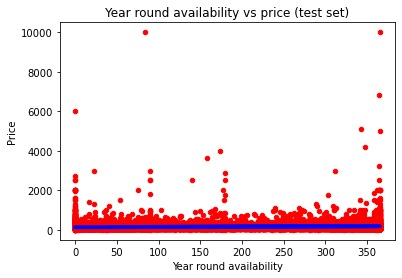

In [53]:
# Plot the new model
plot_test.scatter(z_test,y_test, color = 'red', s =20)
plot_test.plot(z_test,yz_predicted, color = 'blue', linewidth = 4)
plot_test.title('Year round availability vs price (test set)')
plot_test.xlabel('Year round availability')
plot_test.ylabel('Price')
plot_test.show()

In [54]:
rmse = mean_squared_error(y_test, yz_predicted)
r2 = r2_score(y_test, yz_predicted)

In [55]:
# Get slope, RMSE, and R2 score of the 'Year round availability vs price' graph
print('Slope: ', regression.coef_)
print('RMSE: ', rmse)
print('R2 Score ', r2)

Slope:  [[0.14627484]]
RMSE:  52706.43046306548
R2 Score  0.007917640377605673


As we saw in the previous test, the model did not perform well with this graph.